In [3]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import math
import gc
import pprint
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv("Train.csv")

In [5]:
test=pd.read_csv("Test.csv")

새로운 csv 파일

* inst_id index로 했었는데 csv 변환 후 불러오니깐 index로 안불려져서 index로 설정하시든, drop으로 설정
* bedCount_class: bedCount 1: ~30, 2: 30~100, 3: 100~300, 4: 300~ 
* Train은 train, valid로 나누기 전 데이터셋
* Train_lr: 로지스틱 feature selection 해서 뽑힌 컬럼들 + OC
* Train_dt: 분류나무 feature selection 해서 뽑힌 컬럼들 + OC 

In [12]:
train=train.drop('inst_id',axis=1)
train.head(5)

,OC,sido_choongchung,sido_gangwon,sido_gyeongin,sido_gyeongsang,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,instkind_nan,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22.162515,0.000000,22.099796,21.433189,16.566138,16.539187,16.398469,17.269990,19.232365,20.735886,20.720935,19.968362,16.525413,21.645374,21.582217,18.781494,0.0,20.341751,19.120425,0.000000,19.992422,19.676297,21.768639,21.126324,22.181380,0.000000,22.123814,21.447809,16.600193,17.216153,16.568091,16.749797,19.152229,20.537140,20.520624,20.076434,16.425505,21.658620,21.592994,18.798422,0.0,20.447504,19.222130,0.000000,20.099863,19.781657,21.686169,20.963246,4.143135,4.174387,0.0,3.0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.980280,9.659782,23.481393,19.521179,17.056168,16.823799,15.443340,15.495813,20.342724,19.074269,19.037270,10.917985,16.218383,19.670926,19.568364,15.878952,0.0,19.623979,19.023845,9.354666,18.934266,18.096803,18.567912,12.280544,20.078340,9.609001,19.910191,19.440285,16.978333,17.291624,15.026843,16.011168,17.025473,19.100225,19.065542,11.998936,16.044684,19.499605,19.428651,15.372413,0.0,19.505616,18.841626,9.180719,18.812726,17.568559,18.838180,12.258481,6.687109,6.701960,0.0,4.0
2,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.727778,20.060616,19.918561,19.507228,11.240552,10.308986,0.000000,0.000000,17.549955,19.422937,19.351593,15.906875,16.747236,18.607003,18.607003,0.000000,0.0,18.341793,18.341793,0.000000,0.000000,0.000000,19.520988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.459586,0.693147,0.0,4.0
3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.006954,0.000000,24.981392,24.182293,20.042488,20.954034,20.902985,18.973242,20.621045,23.291406,23.168630,0.000000,21.133250,24.488628,24.369258,22.095768,0.0,24.469560,24.055180,23.713241,23.388542,22.704687,23.352064,22.880092,24.925842,0.000000,24.896486,24.114795,19.982624,21.026087,20.968110,19.204088,20.546991,23.132525,23.014845,0.000000,20.934483,24.401680,24.274484,22.088313,0.0,24.354384,23.557572,22.944579,23.755157,23.437961,23.284691,22.769775,6.498282,6.498282,0.0,4.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.615974,0.000000,24.587275,23.920337,18.537150,21.073281,20.991191,0.000000,18.206865,22.566524,22.493677,22.134087,19.910926,24.499866,24.491560,19.219718,0.0,24.633249,24.087425,23.609762,23.767260,23.325956,18.273475,22.923325,24.596190,0.000000,24.576086,23.878565,20.208680,21.143362,21.023260,0.000000,17.301128,22.313883,22.219315,21.936761,19.908536,24.563393,24.543819,20.486709,0.0,24.663538,24.126880,23.590810,23.784786,23.370010,15.531458,22.923325,5.332719,5.288267,0.0,3.0


In [13]:
test=test.drop('inst_id',axis=1)
test.head(5)

,OC,sido_choongchung,sido_gyeongin,sido_gyeongsang,sido_jeju,sido_jeonra,sido_seoul,instkind_clinic,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,instkind_nan,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,bedCount_class
0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.925341,0.000000,24.907711,24.196379,22.185153,22.312810,21.297558,18.155151,20.037430,23.978043,23.917333,20.400658,21.146200,24.595983,24.558393,20.430655,0.0,24.938218,24.717069,24.362411,23.320758,22.566842,22.563144,22.914314,24.875938,0.000000,24.860211,24.130096,22.128492,22.189377,21.179820,19.201838,20.065837,23.941738,23.887866,20.936564,20.993779,24.562759,24.497473,20.495595,0.0,24.737962,24.648885,24.338050,22.275075,22.268698,23.501178,22.914314,6.542472,6.542472,0.0,3.0
1,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,24.277401,0.000000,24.207354,23.540024,18.045409,21.406884,21.384125,0.000000,19.930422,22.491710,22.404503,20.309308,20.008954,25.042221,24.924767,15.319588,0.0,24.916963,24.463538,23.871719,23.907878,23.568175,23.411417,23.071090,24.348740,0.000000,24.378724,23.666511,19.071975,22.030075,21.424438,0.000000,18.389877,22.428690,22.321313,18.855256,20.144076,24.906747,24.904599,16.489659,0.0,24.932551,24.463273,23.909618,23.950510,23.630167,22.055404,0.000000,5.940171,5.918894,0.0,2.0
2,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,23.870014,21.656442,23.862557,23.181772,21.194483,21.046031,20.512693,0.000000,18.951403,23.261171,23.151533,22.716210,20.996276,24.106118,24.066351,18.748595,0.0,0.000000,24.066351,23.806220,0.000000,0.000000,0.000000,23.519657,23.929273,21.128798,23.890406,23.200767,19.279858,21.007586,20.254739,16.537481,17.461825,23.329063,23.260015,22.669705,20.621791,24.103856,24.047434,19.876620,0.0,0.000000,24.047434,23.806220,0.000000,0.000000,0.000000,23.519657,5.285888,5.225619,0.2,3.0
3,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,22.302379,21.446452,0.000000,0.000000,21.749187,22.880193,22.789032,0.000000,20.439834,24.932465,24.884536,0.000000,0.0,24.087758,23.982974,23.654559,21.779972,0.000000,24.574017,0.000000,0.000000,0.000000,0.000000,0.000000,22.327798,21.471250,0.000000,0.000000,21.775064,23.212245,23.144950,0.000000,20.480117,24.392173,24.307323,0.000000,0.0,23.217724,22.980460,22.170624,21.662855,0.000000,24.390483,0.000000,6.634633,6.634633,0.0,4.0
4,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.642667,0.000000,24.606025,23.857170,21.151439,0.000000,21.668651,0.000000,21.931233,22.783750,22.688744,18.519621,20.382809,24.882907,24.821652,21.999192,0.0,24.619492,23.943482,23.568302,23.908909,23.023490,23.844835,23.426431,24.495796,0.000000,24.428956,23.652653,21.312274,0.000000,22.090703,0.000000,22.252373,22.903426,22.786169,18.988265,20.701982,24.831791,24.819959,20.119500,0.0,24.506540,22.742900,21.916712,24.318498,23.784183,23.971502,23.436150,6.082219,5.955837,0.0,3.0


In [14]:
X_train = train.drop('OC', axis=1)
y_train = train['OC']

In [17]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(240, 65) (61, 65)


# XGBoost

##### 트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나입니다.
##### GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘
##### 참고 : https://injo.tistory.com/44

- 장점 

1. 뛰어난 예측 성능 
2. GBM 대비 빠른 수행 시간
3. 과적합 규제
4. 트리 가지치기 : 긍정 이득이 없는 분할을 가지치기해 분할 수 감소
5. 자체 내장된 교차 검정 
6. 결손값 자체 처리

XGBoost는 독자적인 XGBoost 모듈과 사이킷런 프레임워크 기반의 모듈이 존재합니다.

독자적인 모듈은 고유의 API와 하이퍼파라미터를 사용하지만, 사이킷런 기반 모듈에서는 다른 Estimator와 동일한 사용법을 가지고 있습니다.

In [2]:
pip install xgboost

     -------------------------------------- 125.4/125.4 MB 5.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings

In [16]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400

params = {'max_depth' : 3, # 0을 지정하면 깊이의 제한이 없음 - 너무 크면 과적합 (통상 3~10정도 적용)
         'eta' : 0.1, 
         'objective' : 'reg:linear',
         'eval_metric' : 'rmse', # 평가 세트에 적용할 성능 평가 방법
         'early_stoppings' : 100 }

num_rounds = 400

# early_stoppings : XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지
# 조기중단을 위한 최소 반복횟수는 100

In [18]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[08:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "early_stoppings" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:0.45856	eval-rmse:0.45837
[1]	train-rmse:0.42144	eval-rmse:0.42023
[2]	train-rmse:0.38880	eval-rmse:0.38706
[3]	train-rmse:0.35962	eval-rmse:0.35832
[4]	train-rmse:0.33418	eval-rmse:0.33297
[5]	train-rmse:0.31129	eval-rmse:0.31164
[6]	train-rmse:0.28739	eval-rmse:0.29503
[7]	train-rmse:0.26651	eval-rmse:0.28461
[8]	train-rmse:0.24898	eval-rmse:0.27321
[9]	train-rmse:0.23344	eval-rm

[180]	train-rmse:0.06570	eval-rmse:0.22280
[181]	train-rmse:0.06564	eval-rmse:0.22280
[182]	train-rmse:0.06559	eval-rmse:0.22277
[183]	train-rmse:0.06558	eval-rmse:0.22278
[184]	train-rmse:0.06554	eval-rmse:0.22279
[185]	train-rmse:0.06552	eval-rmse:0.22282
[186]	train-rmse:0.06551	eval-rmse:0.22287
[187]	train-rmse:0.06548	eval-rmse:0.22283
[188]	train-rmse:0.06546	eval-rmse:0.22280
[189]	train-rmse:0.06544	eval-rmse:0.22287
[190]	train-rmse:0.06543	eval-rmse:0.22285
[191]	train-rmse:0.06542	eval-rmse:0.22282
[192]	train-rmse:0.06542	eval-rmse:0.22283
[193]	train-rmse:0.06540	eval-rmse:0.22279
[194]	train-rmse:0.06538	eval-rmse:0.22274
[195]	train-rmse:0.06537	eval-rmse:0.22274
[196]	train-rmse:0.06537	eval-rmse:0.22272
[197]	train-rmse:0.06533	eval-rmse:0.22274
[198]	train-rmse:0.06531	eval-rmse:0.22268
[199]	train-rmse:0.06528	eval-rmse:0.22268
[200]	train-rmse:0.06527	eval-rmse:0.22280
[201]	train-rmse:0.06526	eval-rmse:0.22283
[202]	train-rmse:0.06524	eval-rmse:0.22285
[203]	train

[371]	train-rmse:0.06459	eval-rmse:0.22293
[372]	train-rmse:0.06459	eval-rmse:0.22294
[373]	train-rmse:0.06459	eval-rmse:0.22294
[374]	train-rmse:0.06459	eval-rmse:0.22295
[375]	train-rmse:0.06458	eval-rmse:0.22294
[376]	train-rmse:0.06458	eval-rmse:0.22293
[377]	train-rmse:0.06458	eval-rmse:0.22293
[378]	train-rmse:0.06458	eval-rmse:0.22293
[379]	train-rmse:0.06458	eval-rmse:0.22293
[380]	train-rmse:0.06458	eval-rmse:0.22292
[381]	train-rmse:0.06458	eval-rmse:0.22293
[382]	train-rmse:0.06458	eval-rmse:0.22292
[383]	train-rmse:0.06458	eval-rmse:0.22291
[384]	train-rmse:0.06458	eval-rmse:0.22292
[385]	train-rmse:0.06458	eval-rmse:0.22292
[386]	train-rmse:0.06458	eval-rmse:0.22291
[387]	train-rmse:0.06458	eval-rmse:0.22291
[388]	train-rmse:0.06458	eval-rmse:0.22291
[389]	train-rmse:0.06458	eval-rmse:0.22291
[390]	train-rmse:0.06458	eval-rmse:0.22292
[391]	train-rmse:0.06458	eval-rmse:0.22292
[392]	train-rmse:0.06458	eval-rmse:0.22292
[393]	train-rmse:0.06458	eval-rmse:0.22293
[394]	train

In [21]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.916 0.938 0.978 0.95  0.997 0.974 0.908 0.935 1.006 0.979]
예측값 10개만 표시:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [25]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))

In [26]:
get_clf_eval(y_test, preds)

오차행렬:
 [[ 0  2]
 [ 1 58]]

정확도: 0.9508
정밀도: 0.9667
재현율: 0.9831
F1: 0.9748


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

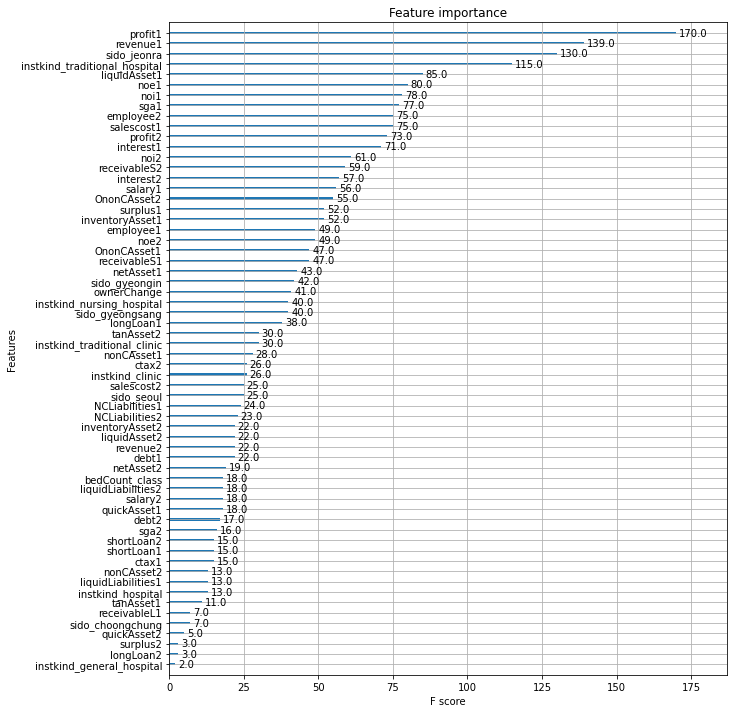

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

# Feature importance를 시각화할 때,
# → 기본 평가 지료로 f1스코어를 기반으로 각 feature의 중요도를 나타냅니다.
# → 사이킷런 래퍼는 estimator 객체의 featureimportances 속성을 이용해 시각화 코드를 직접 작성해야 합니다.
# → 반면, 파이썬 래퍼는 plot_importance()를 이용해 바로 피처 중요 코드를 시각화

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)